# Grating Efficiency Checks for Mini-X Calibration

In [7]:
import astropy.units as u
import astropy.table
import numpy as np
import matplotlib.pyplot as plt

from mocksipipeline.instrument.configuration import moxsi_built, moxsi_built_spectrogram_pinhole

In [22]:
gold_line = (2.123 * u.keV).to('Angstrom',equivalencies=u.equivalencies.spectral())

  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]


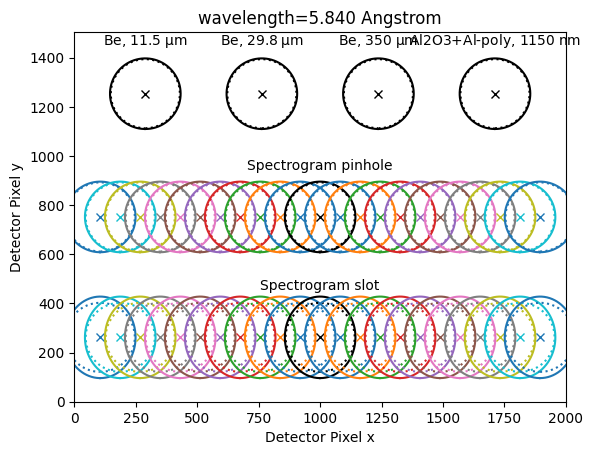

In [23]:
moxsi_built.plot_detector_layout(wavelength=gold_line)

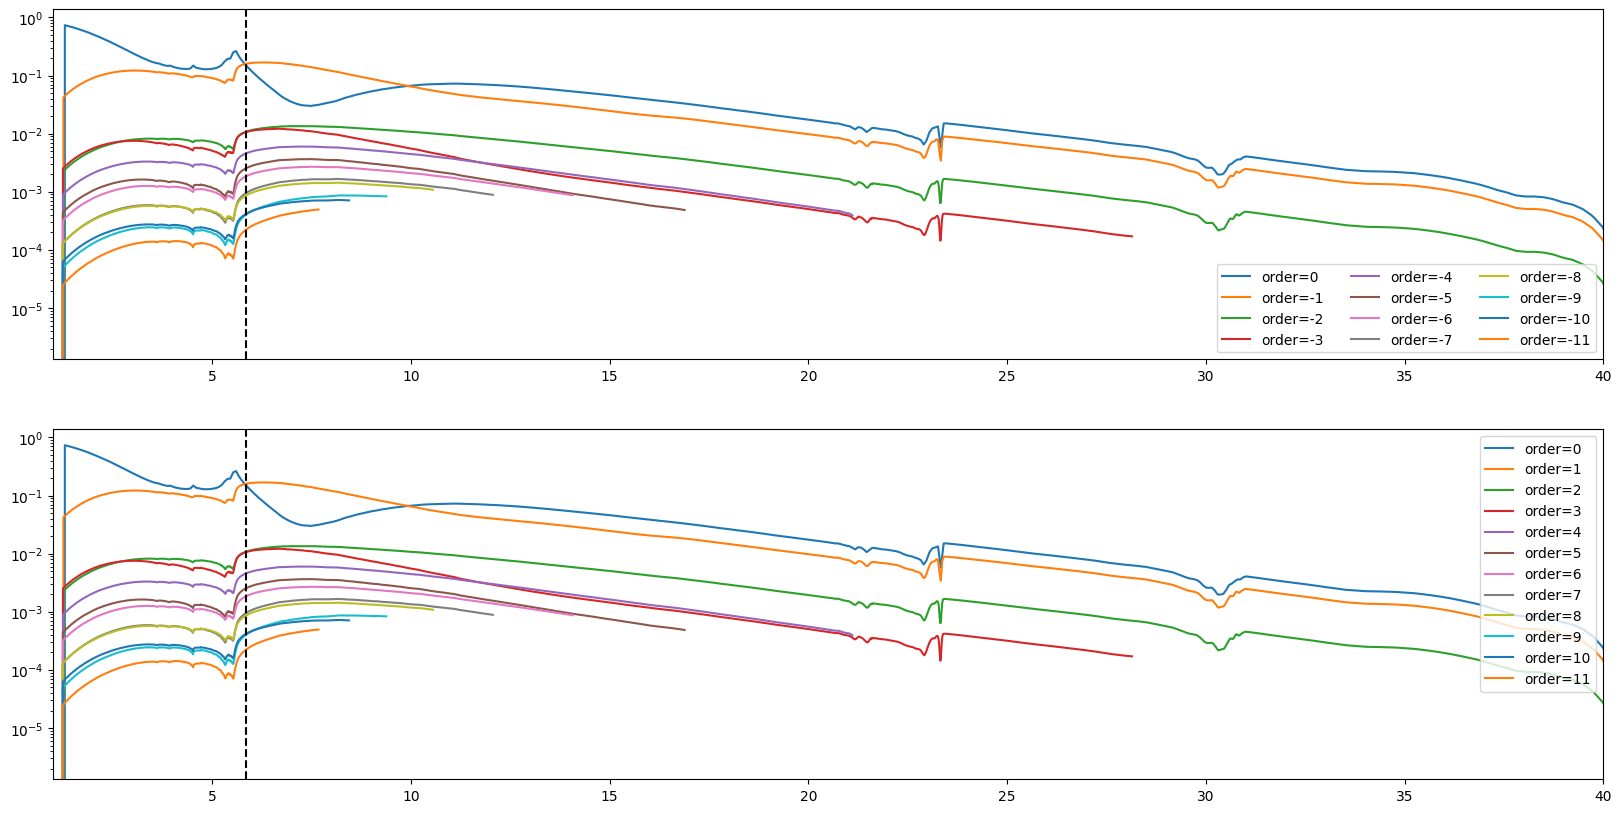

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(211)
for chan in moxsi_built_spectrogram_pinhole[:12][::-1]:
    plt.plot(chan.wavelength, chan.grating_efficiency, label=f'order={chan.spectral_order}')
#plt.xscale('log')
plt.axvline(x=gold_line.to_value('AA'),color='k',ls='--')
plt.yscale('log')
plt.xlim(1,40)
plt.legend(ncol=3,loc=4)
plt.subplot(212)
for chan in moxsi_built_spectrogram_pinhole[11:]:
    plt.plot(chan.wavelength, chan.grating_efficiency, label=f'order={chan.spectral_order}')
plt.axvline(x=gold_line.to_value('AA'),color='k',ls='--')
#plt.xscale('log')
plt.yscale('log')
plt.xlim(1,40)
plt.legend()

In [63]:
chan_ref = moxsi_built_spectrogram_pinhole['spectrogram_pinhole_0']
chan_ref_efficiency = np.interp(gold_line, chan_ref.wavelength, chan_ref.grating_efficiency)

In [64]:
spec_order = []
ge = []
for chan in moxsi_built_spectrogram_pinhole:
    spec_order.append(chan.spectral_order)
    ge.append(np.interp(gold_line, chan.wavelength, chan.grating_efficiency))
spec_order = np.array(spec_order)
ge = np.array(ge)
ge_ratio = ge / chan_ref_efficiency

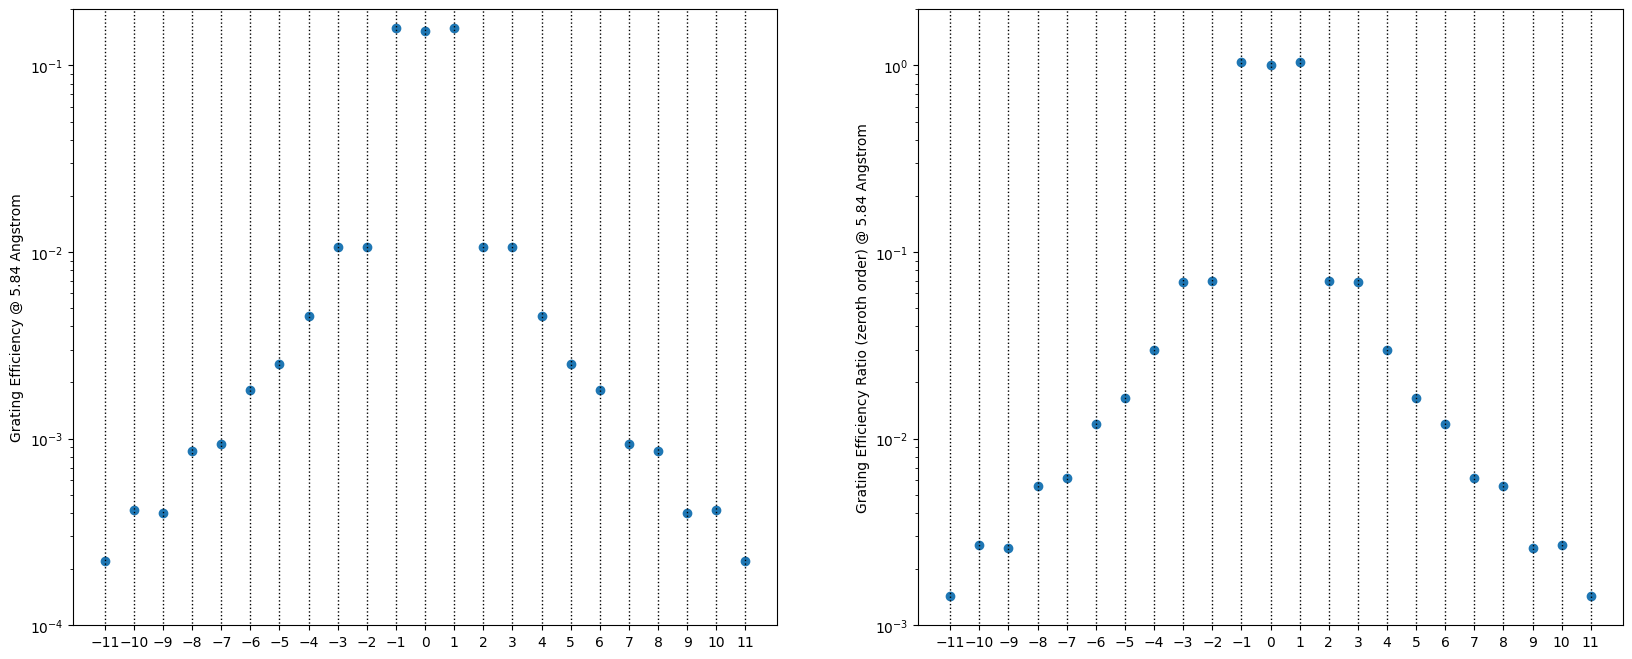

In [84]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(spec_order, ge, marker='o', ls='')
plt.vlines(spec_order, 1e-6, 10, ls=':', color='k', lw=1)
plt.yscale('log')
plt.ylim(1e-4,0.2)
plt.ylabel(f'Grating Efficiency @ {gold_line:.2f}')
plt.xticks(spec_order);
plt.subplot(122)
plt.plot(spec_order, ge_ratio, marker='o', ls='')
plt.vlines(spec_order, 1e-6, 10, ls=':', color='k', lw=1)
plt.yscale('log')
plt.ylim(1e-3,2)
plt.ylabel(f'Grating Efficiency Ratio (zeroth order) @ {gold_line:.2f}')
plt.xticks(spec_order);